In [143]:
import pandas as pd
from google.colab import drive

# Google Driveをマウント
drive.mount('/content/drive')

# Google Drive内のファイルパスを指定
file_path = '/content/drive/My Drive/研究/gdp_growth_rate_monthly改変.csv'

# データを読み込み、日付列をインデックスとして設定
gdp_data = pd.read_csv(file_path, parse_dates=['Date'], index_col='Date')

# GDP Growth列を線形補完
gdp_data['GDP Growth'] = gdp_data['GDP Growth'].interpolate(method='linear')

# 結果を確認
print(gdp_data.head())
print(gdp_data.tail())

# 必要であれば補完後のデータをGoogle Driveに保存
output_path = '/content/drive/My Drive/研究/gdp_growth_rate_monthly_interpolated.csv'
gdp_data.to_csv(output_path)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
            GDP Growth
Date                  
1994-04-30         NaN
1994-05-31   -0.500000
1994-06-30    0.033333
1994-07-31    0.566667
1994-08-31    1.100000
            GDP Growth
Date                  
2024-02-29   -0.600000
2024-03-31   -0.166667
2024-04-30    0.266667
2024-05-31    0.700000
2024-06-30    0.700000


In [144]:
# 各列のデータ型を確認
print(data.dtypes)

# 各列のデータ例を確認
print(data.head())

# データに文字列や特殊な値が含まれていないか確認
for column in data.columns:
    print(f"Unique values in {column}:")
    print(data[column].unique())


Return        float64
Regime         object
Regime_Num      int64
dtype: object
            Return     Regime  Regime_Num
Date                                     
1994-05-31 -0.0157  Recession           2
1994-06-30 -0.0094  Recession           2
1994-07-31  0.0088  Recession           2
1994-08-31 -0.0516  Recession           2
1994-09-30  0.0218  Recession           2
Unique values in Return:
[-0.0157 -0.0094  0.0088 -0.0516  0.0218 -0.0457  0.0339 -0.0544 -0.0856
 -0.0535  0.0413 -0.0815 -0.0596  0.1489  0.0863 -0.0113 -0.0144  0.0617
  0.06    0.0476 -0.0331  0.0637  0.0296 -0.0039  0.0262 -0.0816 -0.0254
  0.0689 -0.0505  0.027  -0.0789 -0.0533  0.0124 -0.0299  0.0638  0.0479
  0.0267 -0.0133 -0.1034 -0.0187 -0.0799  0.0106 -0.0826  0.0897  0.0123
 -0.0181 -0.0536  0.0019  0.0102  0.0347 -0.1387 -0.0497  0.0118  0.0973
 -0.07    0.0475 -0.0091  0.1022  0.0546 -0.0353  0.088   0.0189 -0.0238
  0.0097  0.0191  0.0343  0.0203  0.032   0.0215 -0.1162 -0.0913  0.066
 -0.0967  0.0721 -

Cluster
2    208
1    112
0     42
Name: count, dtype: int64
            GDP Growth  Unemployment   CPI  Interest Rate  Cluster
Date                                                              
1994-05-31   -0.500000           2.9  95.9        2.06250        2
1994-06-30    0.033333           2.9  95.4        2.08185        2
1994-07-31    0.566667           2.9  95.9        2.13043        2
1994-08-31    1.100000           3.0  96.2        2.18906        2
1994-09-30    0.600000           3.0  96.6        2.23750        2


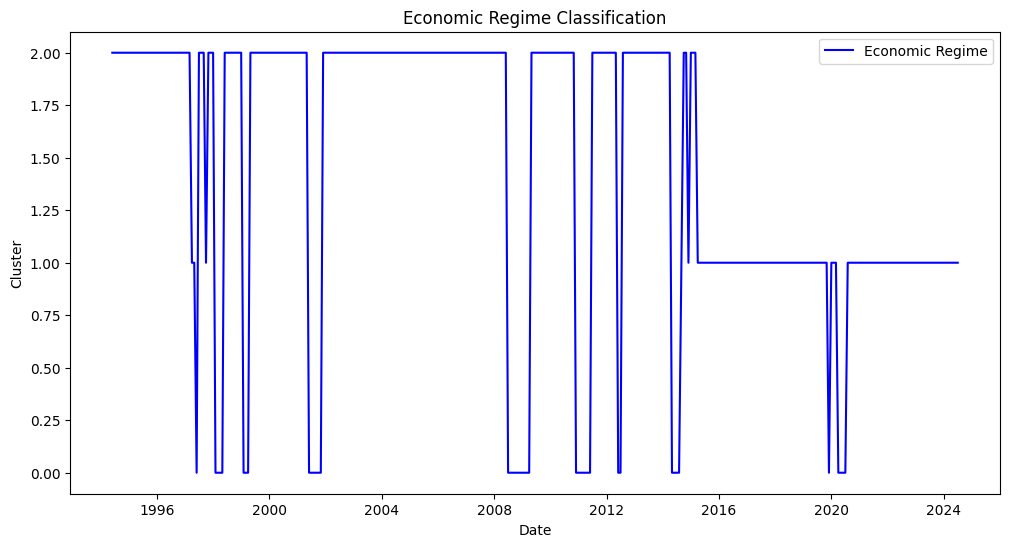

In [145]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# データの読み込み
file_path = '/content/drive/My Drive/研究/macrofactor.csv'
data = pd.read_csv(file_path, index_col='Date', parse_dates=True)

# 必要な列だけ選択（例: GDP成長率、失業率、インフレ率、金利など）
selected_columns = ['GDP Growth', 'Unemployment', 'CPI', 'Interest Rate']
data_selected = data[selected_columns]

# データの標準化
scaler = StandardScaler()
data_standardized = scaler.fit_transform(data_selected)

# K-meansクラスタリングの適用（クラスタ数を3に設定）
kmeans = KMeans(n_clusters=3, random_state=0)
data['Cluster'] = kmeans.fit_predict(data_standardized)

# クラスタリング結果の確認
print(data['Cluster'].value_counts())
print(data.head())

# クラスタリング結果のプロット
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Cluster'], label='Economic Regime', color='blue')
plt.xlabel('Date')
plt.ylabel('Cluster')
plt.title('Economic Regime Classification')
plt.legend()
plt.show()


In [146]:
from sklearn.metrics import silhouette_score

# シルエットスコアの計算
sil_score = silhouette_score(data_standardized, data['Cluster'])
print(f"Silhouette Score: {sil_score}")


Silhouette Score: 0.3258614803299726


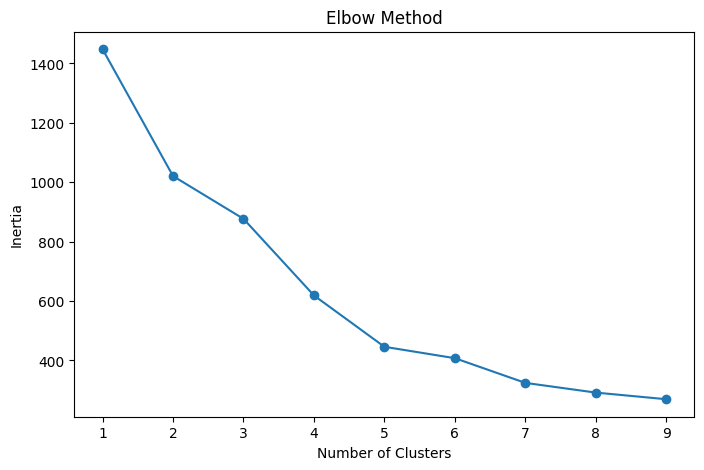

In [147]:
inertia = []
k_range = range(1, 10)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(data_standardized)
    inertia.append(kmeans.inertia_)

# エルボープロット
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()


In [148]:
from sklearn.metrics import davies_bouldin_score

# Davies-Bouldin Indexの計算
db_score = davies_bouldin_score(data_standardized, data['Cluster'])
print(f"Davies-Bouldin Index: {db_score}")


Davies-Bouldin Index: 1.2327568921465766


In [149]:
# クラスタごとの平均値を確認
cluster_summary = data.groupby('Cluster').mean()
print(cluster_summary)


         GDP Growth  Unemployment         CPI  Interest Rate
Cluster                                                     
0         -1.661905      4.366667   97.028571       0.148786
1          0.325595      2.939286  100.676786      -0.008580
2          0.501603      4.441827   95.935577       0.285653


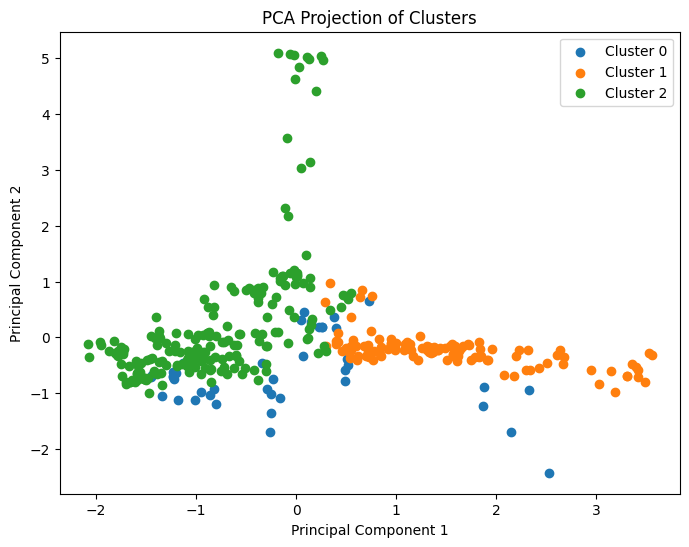

In [150]:
from sklearn.decomposition import PCA

# PCAで次元削減
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_standardized)

# クラスタのプロット
plt.figure(figsize=(8, 6))
for cluster in range(3):
    plt.scatter(data_pca[data['Cluster'] == cluster, 0],
                data_pca[data['Cluster'] == cluster, 1], label=f'Cluster {cluster}')

plt.title('PCA Projection of Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()


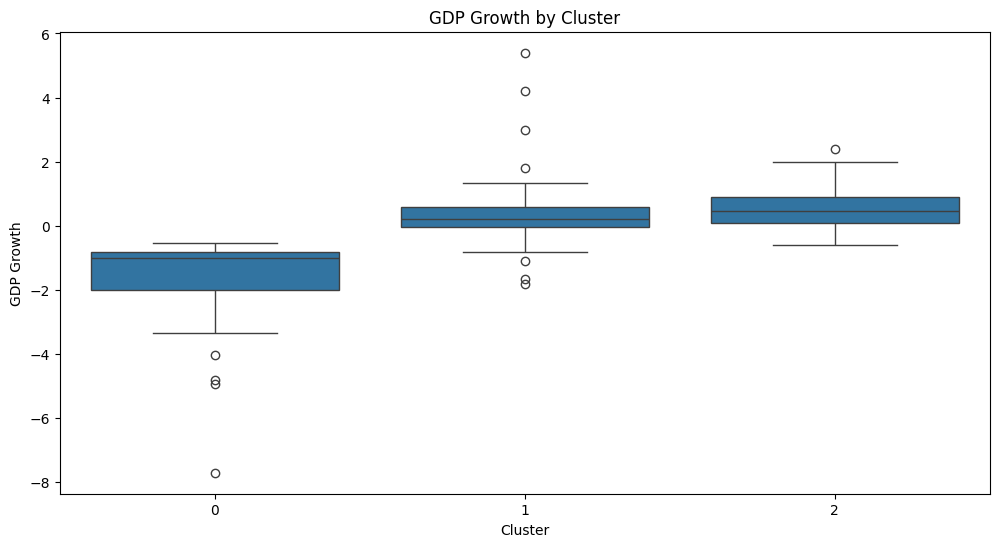

In [151]:
import seaborn as sns
import matplotlib.pyplot as plt

# クラスターごとの指標分布をプロット
plt.figure(figsize=(12, 6))
sns.boxplot(x='Cluster', y='GDP Growth', data=data)
plt.title('GDP Growth by Cluster')
plt.show()


In [152]:
# クラスタ数を5に設定
kmeans = KMeans(n_clusters=5, random_state=0)
data['Cluster_5'] = kmeans.fit_predict(data_standardized)

# シルエットスコアを再計算
sil_score_5 = silhouette_score(data_standardized, data['Cluster_5'])
print(f"Silhouette Score (5 clusters): {sil_score_5}")

# Davies-Bouldin Indexを再計算
db_score_5 = davies_bouldin_score(data_standardized, data['Cluster_5'])
print(f"Davies-Bouldin Index (5 clusters): {db_score_5}")


Silhouette Score (5 clusters): 0.35146037526708784
Davies-Bouldin Index (5 clusters): 0.9098451089017603


In [153]:
# 新しいクラスタリング結果の特徴を分析
cluster_5_summary = data.groupby('Cluster_5').mean()
print(cluster_5_summary)


           GDP Growth  Unemployment         CPI  Interest Rate   Cluster
Cluster_5                                                               
0           -3.494444      3.816667   97.941667       0.068083  0.000000
1            0.366667      2.797674  101.425581      -0.033802  1.000000
2            0.385261      4.964626   95.629932       0.054177  1.755102
3            0.492308      2.930769   96.023077       2.002522  2.000000
4            0.176603      3.675000   97.132692       0.315356  1.519231


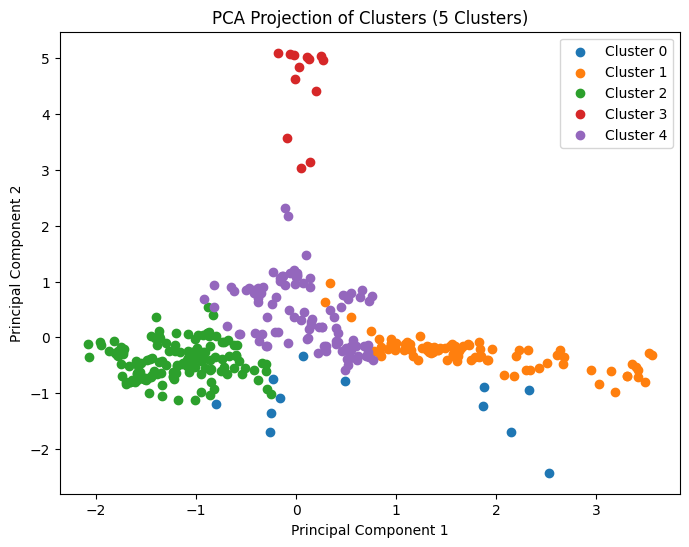

In [154]:
from sklearn.decomposition import PCA

# PCAで2次元に圧縮
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_standardized)

# クラスタの可視化
plt.figure(figsize=(8, 6))
for cluster in range(5):
    plt.scatter(data_pca[data['Cluster_5'] == cluster, 0],
                data_pca[data['Cluster_5'] == cluster, 1], label=f'Cluster {cluster}')

plt.title('PCA Projection of Clusters (5 Clusters)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()


           GDP Growth  Unemployment         CPI  Interest Rate   Cluster
Cluster_5                                                               
0           -3.494444      3.816667   97.941667       0.068083  0.000000
1            0.366667      2.797674  101.425581      -0.033802  1.000000
2            0.385261      4.964626   95.629932       0.054177  1.755102
3            0.492308      2.930769   96.023077       2.002522  2.000000
4            0.176603      3.675000   97.132692       0.315356  1.519231


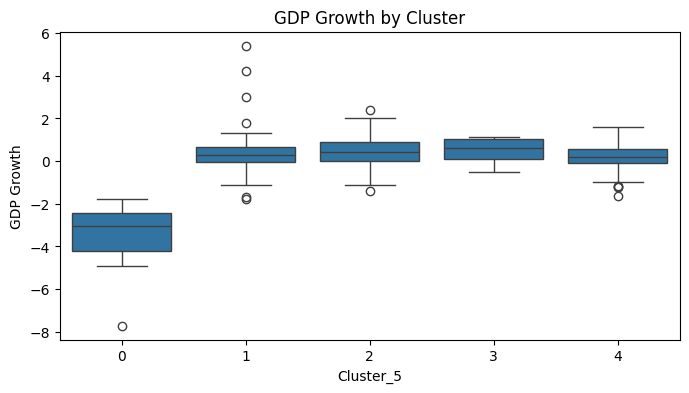

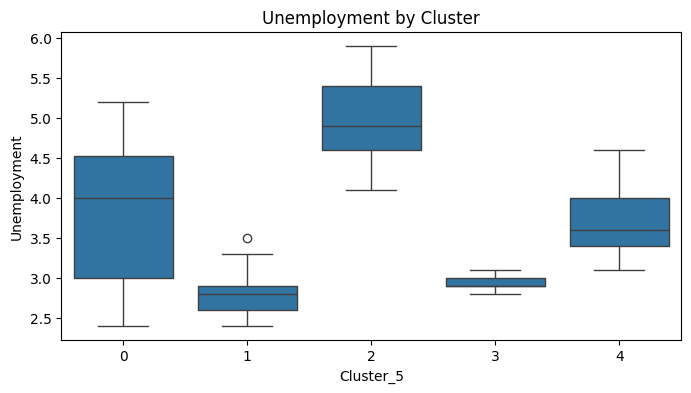

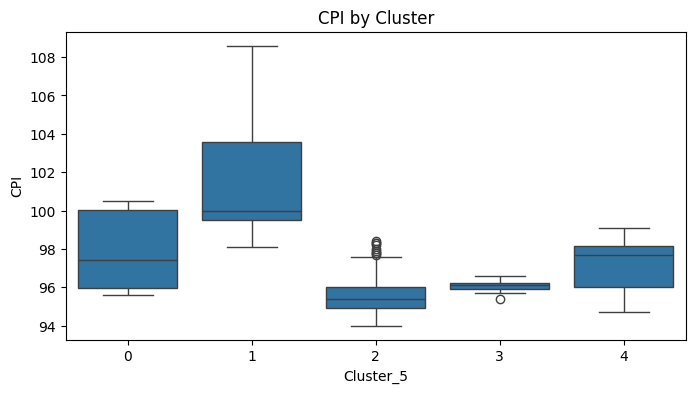

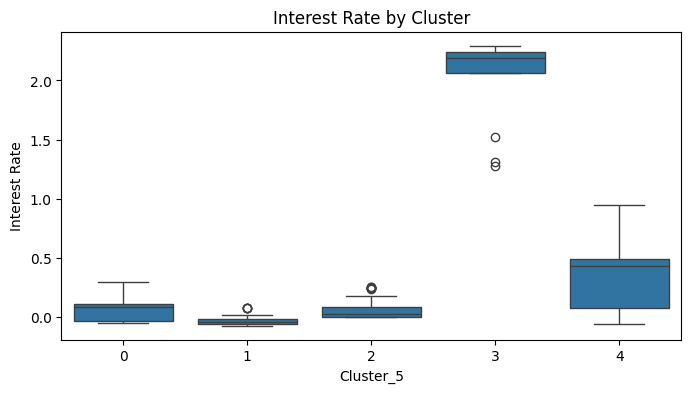

In [155]:
# クラスタごとの平均値を確認
cluster_summary = data.groupby('Cluster_5').mean()
print(cluster_summary)

# 各指標の分布を可視化
import seaborn as sns
for column in ['GDP Growth', 'Unemployment', 'CPI', 'Interest Rate']:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x='Cluster_5', y=column, data=data)
    plt.title(f'{column} by Cluster')
    plt.show()


In [156]:
# 各クラスターの期間を表示
for cluster in range(5):
    print(f"Cluster {cluster}:")
    print(data[data['Cluster_5'] == cluster].index.min(), "to", data[data['Cluster_5'] == cluster].index.max())


Cluster 0:
2008-10-31 00:00:00 to 2020-06-30 00:00:00
Cluster 1:
2016-09-30 00:00:00 to 2024-06-30 00:00:00
Cluster 2:
1999-01-31 00:00:00 to 2013-10-31 00:00:00
Cluster 3:
1994-05-31 00:00:00 to 1995-05-31 00:00:00
Cluster 4:
1995-06-30 00:00:00 to 2017-01-31 00:00:00


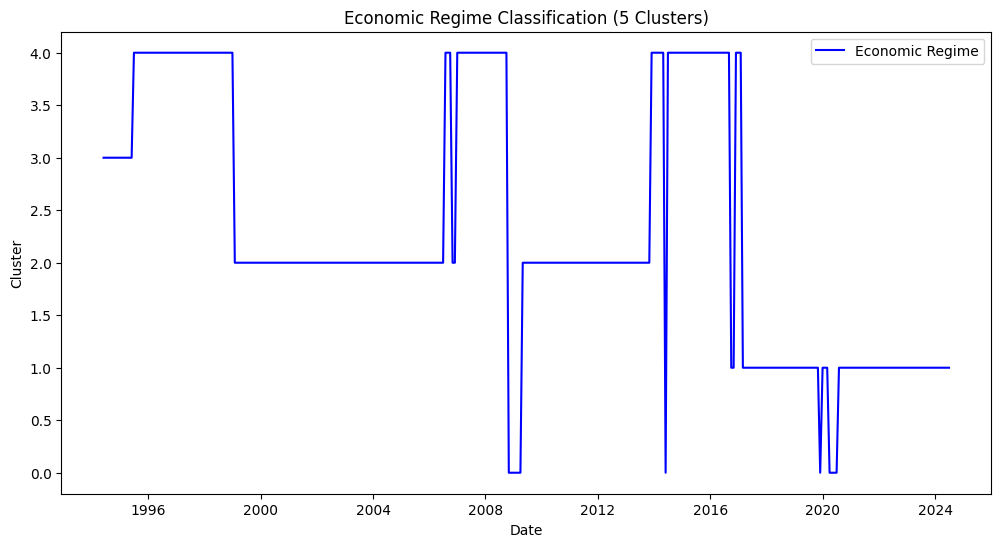

In [157]:
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Cluster_5'], label='Economic Regime', color='blue')
plt.xlabel('Date')
plt.ylabel('Cluster')
plt.title('Economic Regime Classification (5 Clusters)')
plt.legend()
plt.show()


In [158]:
# クラスタごとの平均値・標準偏差を確認
cluster_summary = data.groupby('Cluster').agg(['mean', 'std', 'min', 'max'])
print(cluster_summary)


        GDP Growth                          Unemployment                      \
              mean       std  min       max         mean       std  min  max   
Cluster                                                                        
0        -1.661905  1.472468 -7.7 -0.533333     4.366667  0.805974  2.4  5.6   
1         0.325595  0.861453 -1.8  5.400000     2.939286  0.340999  2.4  3.7   
2         0.501603  0.531960 -0.6  2.400000     4.441827  0.804955  2.8  5.9   

                CPI                        Interest Rate                   \
               mean       std   min    max          mean       std    min   
Cluster                                                                     
0         97.028571  1.796241  94.1  100.5      0.148786  0.182067 -0.048   
1        100.676786  2.916124  97.7  108.6     -0.008580  0.093917 -0.071   
2         95.935577  1.109373  94.0   99.1      0.285653  0.493852  0.000   

                 Cluster_5                    
         

In [159]:
# 経済レジーム名をクラスタに割り当てる
cluster_names = {0: 'Recession', 1: 'Stagnation', 2: 'Expansion'}
data['Regime'] = data['Cluster'].map(cluster_names)

# 確認
print(data[['Cluster', 'Regime']].head())


            Cluster     Regime
Date                          
1994-05-31        2  Expansion
1994-06-30        2  Expansion
1994-07-31        2  Expansion
1994-08-31        2  Expansion
1994-09-30        2  Expansion


In [160]:
import numpy as np

# クラスタの状態を取得
states = data['Cluster'].values

# 遷移行列を計算
n_states = len(data['Cluster'].unique())
transition_matrix = np.zeros((n_states, n_states))

for (i, j) in zip(states[:-1], states[1:]):
    transition_matrix[i, j] += 1

# 遷移確率に変換
transition_matrix = transition_matrix / transition_matrix.sum(axis=1, keepdims=True)

# 遷移行列を表示
print("Transition Matrix:")
print(transition_matrix)


Transition Matrix:
[[0.76190476 0.07142857 0.16666667]
 [0.02702703 0.94594595 0.02702703]
 [0.03365385 0.01923077 0.94711538]]


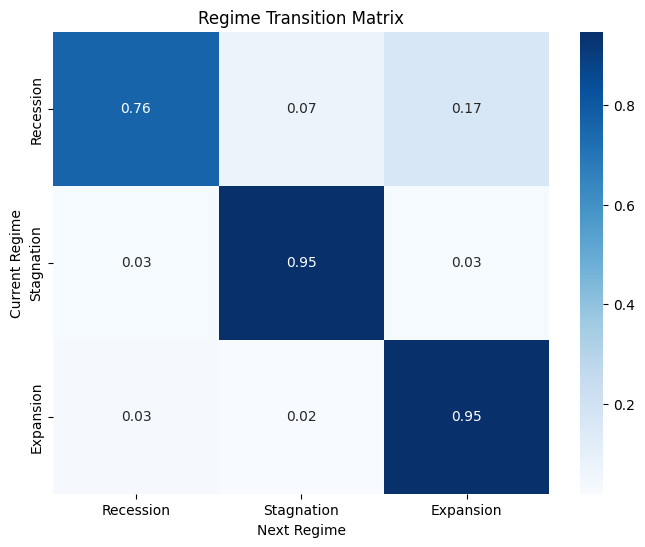

In [161]:
import seaborn as sns
import matplotlib.pyplot as plt

# 遷移行列をヒートマップで可視化
plt.figure(figsize=(8, 6))
sns.heatmap(transition_matrix, annot=True, cmap='Blues', fmt='.2f',
            xticklabels=cluster_names.values(),
            yticklabels=cluster_names.values())
plt.title('Regime Transition Matrix')
plt.xlabel('Next Regime')
plt.ylabel('Current Regime')
plt.show()


In [162]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# 必要な列を選択（例: マクロファクターとNikkeiリターン）
selected_columns = ['GDP Growth', 'Unemployment', 'CPI', 'Interest Rate']
data_selected = data[selected_columns]

# データを標準化
scaler = StandardScaler()
data_standardized = scaler.fit_transform(data_selected)

# クラスタリングの実行（例: クラスタ数3）
kmeans = KMeans(n_clusters=3, random_state=0)
data['Cluster'] = kmeans.fit_predict(data_standardized)

# クラスター名を経済レジームに変換
cluster_names = {0: 'Recession', 1: 'Stagnation', 2: 'Expansion'}
data['Regime'] = data['Cluster'].map(cluster_names)

# 確認
print(data.head())


            GDP Growth  Unemployment   CPI  Interest Rate  Cluster  Cluster_5  \
Date                                                                            
1994-05-31   -0.500000           2.9  95.9        2.06250        2          3   
1994-06-30    0.033333           2.9  95.4        2.08185        2          3   
1994-07-31    0.566667           2.9  95.9        2.13043        2          3   
1994-08-31    1.100000           3.0  96.2        2.18906        2          3   
1994-09-30    0.600000           3.0  96.6        2.23750        2          3   

               Regime  
Date                   
1994-05-31  Expansion  
1994-06-30  Expansion  
1994-07-31  Expansion  
1994-08-31  Expansion  
1994-09-30  Expansion  


In [163]:
# Google Driveへの保存
output_path = '/content/drive/My Drive/研究/classified_data_with_regimes.csv'
data.to_csv(output_path)

print(f"Classified data saved to: {output_path}")


Classified data saved to: /content/drive/My Drive/研究/classified_data_with_regimes.csv


In [164]:
# 保存した分類データを読み込む
file_path = '/content/drive/My Drive/研究/classified_data_with_regimes.csv'
data = pd.read_csv(file_path, index_col='Date', parse_dates=True)

# 確認
print(data.head())


            GDP Growth  Unemployment   CPI  Interest Rate  Cluster  Cluster_5  \
Date                                                                            
1994-05-31   -0.500000           2.9  95.9        2.06250        2          3   
1994-06-30    0.033333           2.9  95.4        2.08185        2          3   
1994-07-31    0.566667           2.9  95.9        2.13043        2          3   
1994-08-31    1.100000           3.0  96.2        2.18906        2          3   
1994-09-30    0.600000           3.0  96.6        2.23750        2          3   

               Regime  
Date                   
1994-05-31  Expansion  
1994-06-30  Expansion  
1994-07-31  Expansion  
1994-08-31  Expansion  
1994-09-30  Expansion  


In [165]:
# 経済レジームデータ（すでに分類されたデータ）を読み込む
macro_regime_file_path = '/content/drive/My Drive/研究/classified_data_with_regimes.csv'
macro_regimes = pd.read_csv(macro_regime_file_path, index_col='Date', parse_dates=True)

# Nikkei 225データを読み込む
nikkei_file_path = '/content/drive/My Drive/研究/Nikkei225py.csv'
nikkei_data = pd.read_csv(nikkei_file_path, index_col='Date', parse_dates=True)


# 経済レジームデータとNikkei 225データを結合
data = pd.merge(nikkei_data[['Return']], macro_regimes[['Regime']], left_index=True, right_index=True, how='inner')

# 確認
print(data.head())


            Return     Regime
Date                         
1994-05-31  -1.57%  Expansion
1994-06-30  -0.94%  Expansion
1994-07-31   0.88%  Expansion
1994-08-31  -5.16%  Expansion
1994-09-30   2.18%  Expansion


In [166]:
# '%'を削除して数値型に変換（パーセントを小数として扱う）
data['Return'] = data['Return'].str.replace('%', '', regex=False).astype(float) / 100

# 確認
print(data['Return'].head())


Date
1994-05-31   -0.0157
1994-06-30   -0.0094
1994-07-31    0.0088
1994-08-31   -0.0516
1994-09-30    0.0218
Freq: ME, Name: Return, dtype: float64


In [167]:
# レジームごとに統計値を計算
regime_stats = data.groupby('Regime')['Return'].agg(['mean', 'std'])
regime_stats.columns = ['Drift (Mean Return)', 'Volatility (Std Dev)']

# 結果を確認
print("Regime Statistics:")
print(regime_stats)


Regime Statistics:
            Drift (Mean Return)  Volatility (Std Dev)
Regime                                               
Expansion              0.002890              0.054805
Recession             -0.004738              0.066095
Stagnation             0.006986              0.048801


In [168]:
output_path = '/content/drive/My Drive/研究/regime_statistics.csv'
regime_stats.to_csv(output_path)
print(f"Regime statistics saved to: {output_path}")


Regime statistics saved to: /content/drive/My Drive/研究/regime_statistics.csv


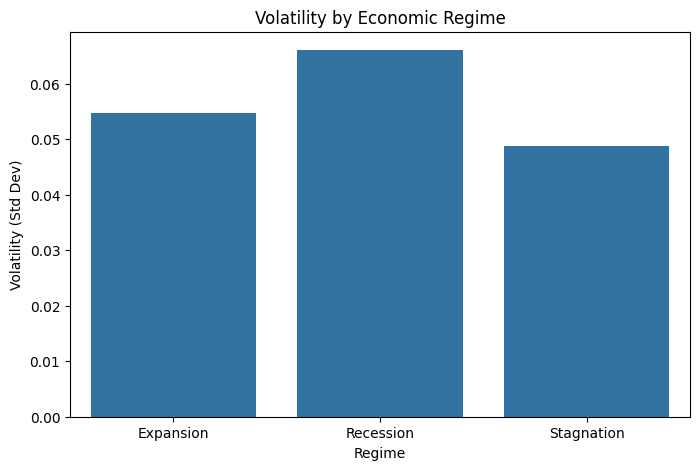

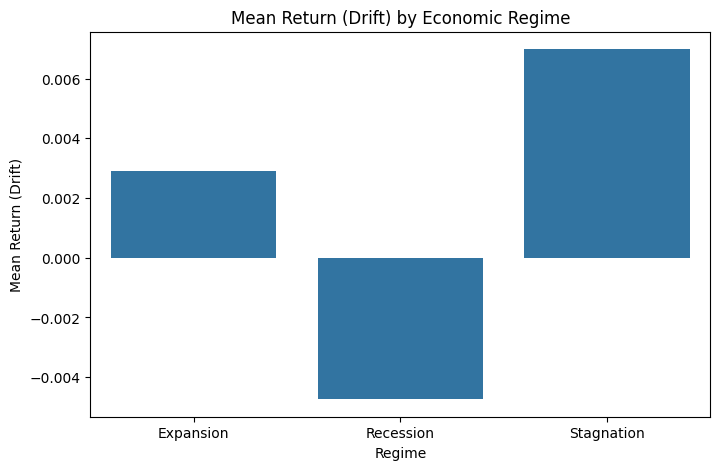

In [169]:
import matplotlib.pyplot as plt
import seaborn as sns

# ボラティリティ（標準偏差）をプロット
plt.figure(figsize=(8, 5))
sns.barplot(x=regime_stats.index, y='Volatility (Std Dev)', data=regime_stats.reset_index())
plt.title('Volatility by Economic Regime')
plt.ylabel('Volatility (Std Dev)')
plt.xlabel('Regime')
plt.show()

# 平均リターン（ドリフト）をプロット
plt.figure(figsize=(8, 5))
sns.barplot(x=regime_stats.index, y='Drift (Mean Return)', data=regime_stats.reset_index())
plt.title('Mean Return (Drift) by Economic Regime')
plt.ylabel('Mean Return (Drift)')
plt.xlabel('Regime')
plt.show()


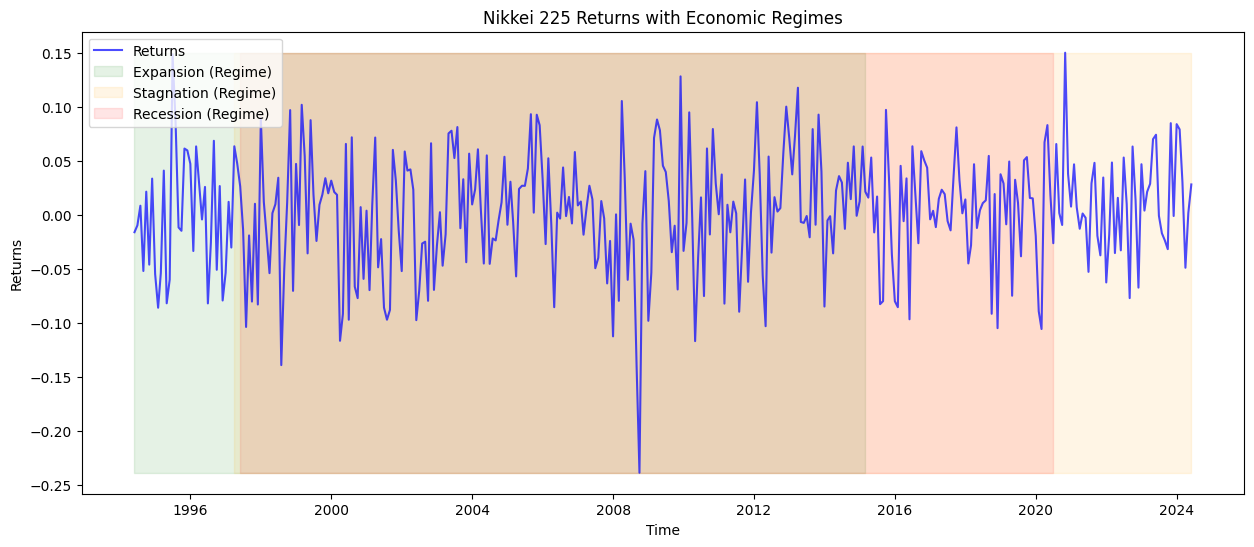

In [170]:
import matplotlib.pyplot as plt
import numpy as np

# レジームごとに色分け
regime_colors = {'Expansion': 'green', 'Stagnation': 'orange', 'Recession': 'red'}

# プロット準備
plt.figure(figsize=(15, 6))

# 元データのリターンをプロット
plt.plot(data.index, data['Return'], label='Returns', color='blue', alpha=0.7)

# 各レジームの背景色を設定
for regime, color in regime_colors.items():
    regime_indices = data[data['Regime'] == regime].index
    plt.fill_between(regime_indices, data['Return'].min(), data['Return'].max(),
                     color=color, alpha=0.1, label=f'{regime} (Regime)')

# プロットの設定
plt.title('Nikkei 225 Returns with Economic Regimes')
plt.xlabel('Time')
plt.ylabel('Returns')
plt.legend(loc='upper left')
plt.show()


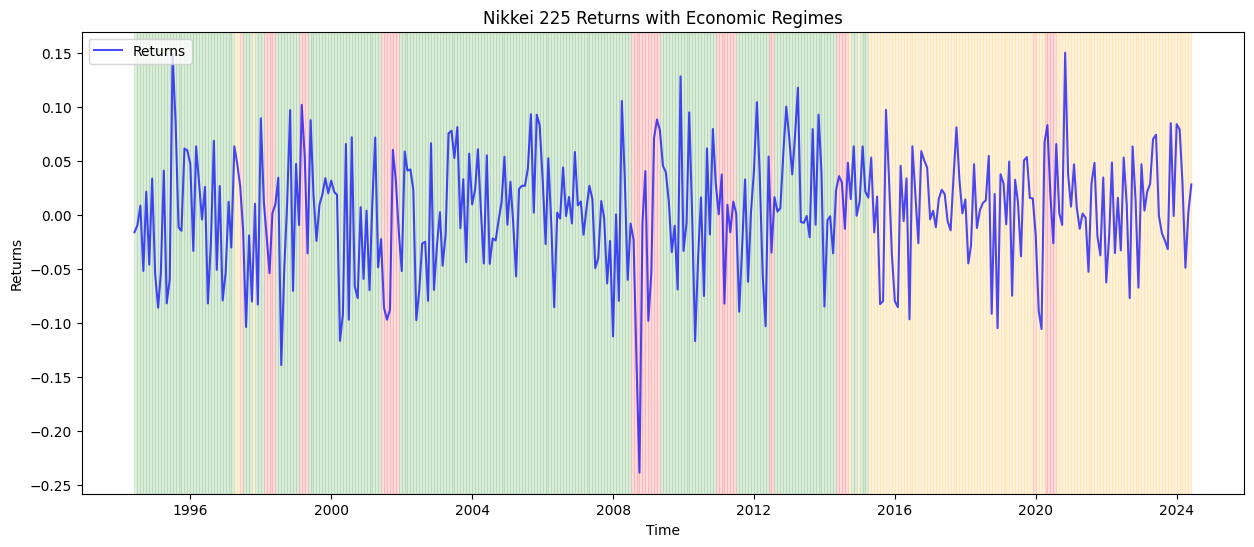

In [171]:
# プロット準備
plt.figure(figsize=(15, 6))

# 元データのリターンをプロット
plt.plot(data.index, data['Return'], label='Returns', color='blue', alpha=0.7)

# 各データポイントごとに背景色を設定
for i in range(len(data)):
    plt.axvspan(data.index[i], data.index[i + 1] if i + 1 < len(data) else data.index[i],
                color=regime_colors[data['Regime'].iloc[i]], alpha=0.1)

# プロットの設定
plt.title('Nikkei 225 Returns with Economic Regimes')
plt.xlabel('Time')
plt.ylabel('Returns')
plt.legend(loc='upper left')
plt.show()


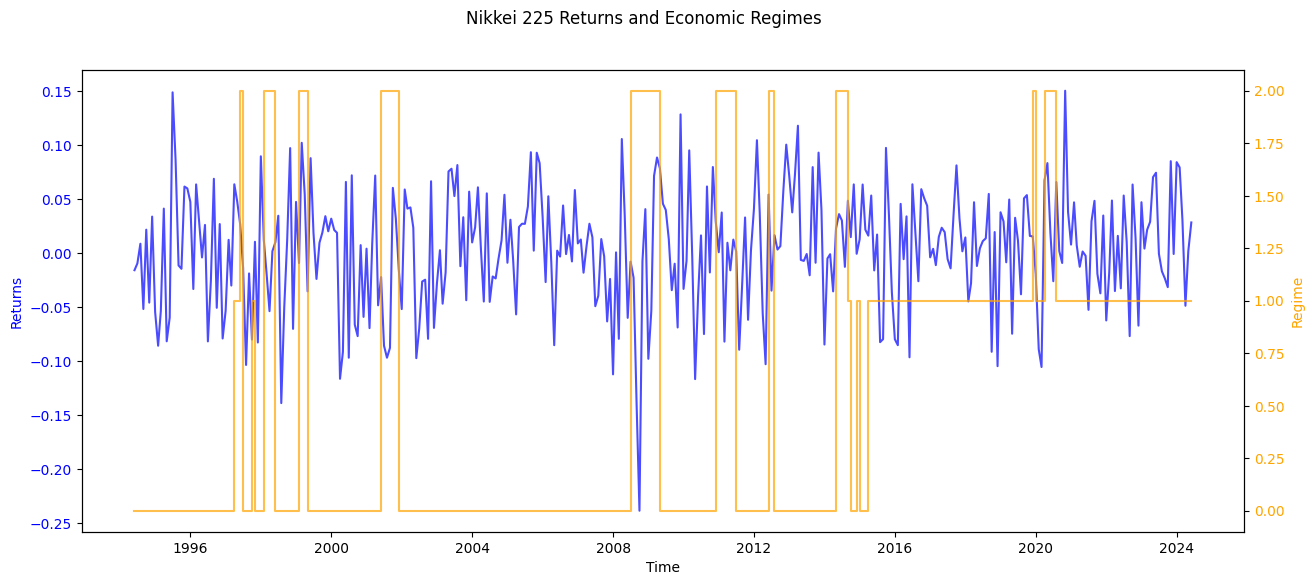

In [172]:
# レジーム列を数値化（既にある場合は省略）
regime_mapping = {'Expansion': 0, 'Stagnation': 1, 'Recession': 2}
data['Regime_Num'] = data['Regime'].map(regime_mapping)

# プロット準備
fig, ax1 = plt.subplots(figsize=(15, 6))

# 元データのリターンをプロット
ax1.plot(data.index, data['Return'], label='Returns', color='blue', alpha=0.7)
ax1.set_ylabel('Returns', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# レジームの遷移をタイムラインとしてプロット
ax2 = ax1.twinx()
ax2.plot(data.index, data['Regime_Num'], label='Regime', color='orange', drawstyle='steps-post', alpha=0.7)
ax2.set_ylabel('Regime', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# プロットの設定
fig.suptitle('Nikkei 225 Returns and Economic Regimes')
ax1.set_xlabel('Time')
plt.show()


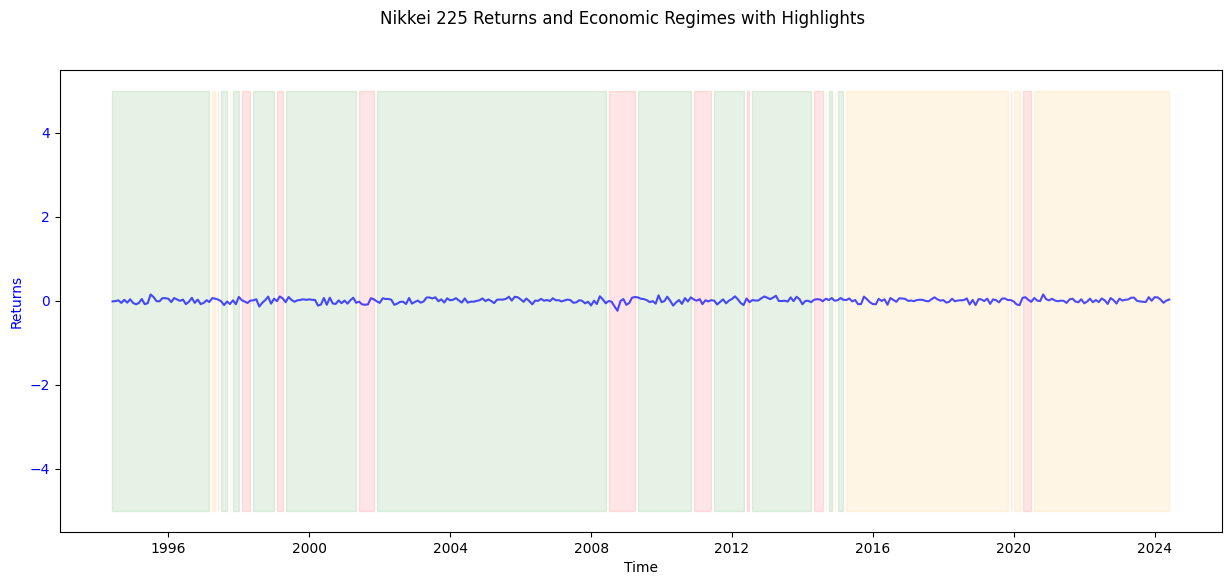

In [173]:
# プロット準備
fig, ax1 = plt.subplots(figsize=(15, 6))

# 元データのリターンをプロット
ax1.plot(data.index, data['Return'], label='Returns', color='blue', alpha=0.7)
ax1.set_ylabel('Returns', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# レジームを背景色として表示
for regime, color in regime_colors.items():
    ax1.fill_between(data.index, -5, 5, where=(data['Regime'] == regime), color=color, alpha=0.1)

# プロットの設定
fig.suptitle('Nikkei 225 Returns and Economic Regimes with Highlights')
ax1.set_xlabel('Time')
plt.show()
